In [1]:
%load_ext cudf.pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import os
import zipfile

In [95]:
d1 = pd.read_csv("/home/sistemas/Documents/sexto/Covid-LATAM-Study/new/totales-2023.csv",usecols=["fecha"])
d = pd.read_csv("/home/sistemas/Documents/sexto/Covid-LATAM-Study/new/totales_mexico-2023.csv")#index_col=["fecha"])
#d.index = pd.to_datetime(d.index).normalize()


In [66]:
d1

,fecha
0,2023-01-03T00:00:00.000000000Z
1,2023-01-03T00:00:00.000000000Z
2,2023-01-03T00:00:00.000000000Z
3,2023-01-03T00:00:00.000000000Z
4,2023-01-03T00:00:00.000000000Z
...,...
99,2023-11-28T00:00:00.000000000Z
100,2023-12-05T00:00:00.000000000Z
101,2023-12-12T00:00:00.000000000Z
102,2023-12-19T00:00:00.000000000Z


In [99]:
d.iloc[:,0]= d1["fecha"]

In [101]:
d.head(3)
d.rename(columns={"Unnamed: 0":"fecha"},inplace=True)
d.iloc[:,0] = pd.to_datetime(d["fecha"])
d.set_index("fecha",inplace=True)
d.head(3)

,edo-0,edo-1,edo-2,edo-3,edo-4,edo-5,edo-6,edo-7,edo-8,edo-9,...,edo-22,edo-23,edo-24,edo-25,edo-26,edo-27,edo-28,edo-29,edo-30,edo-31
fecha,,,,,,,,,,,,,,,,,,,,,
2023-01-03 00:00:00+00:00,91139,140747,120719,38498,158691,56379,107630,123463,1896084,58257,...,72476,302023,229943,127014,148762,140263,51034,146926,107821,72715
2023-01-03 00:00:00+00:00,92254,143167,121737,38743,160420,57163,109163,124309,1917009,59126,...,73095,305111,231224,128357,150723,142022,51890,149109,108628,73660
2023-01-03 00:00:00+00:00,93578,144892,122403,38999,162051,57945,110983,125154,1935268,60048,...,73614,307542,232512,129939,152040,143576,52835,151137,109283,74646


In [25]:
%pwd

'/home/sistemas/Documents/sexto/Covid-LATAM-Study/new'

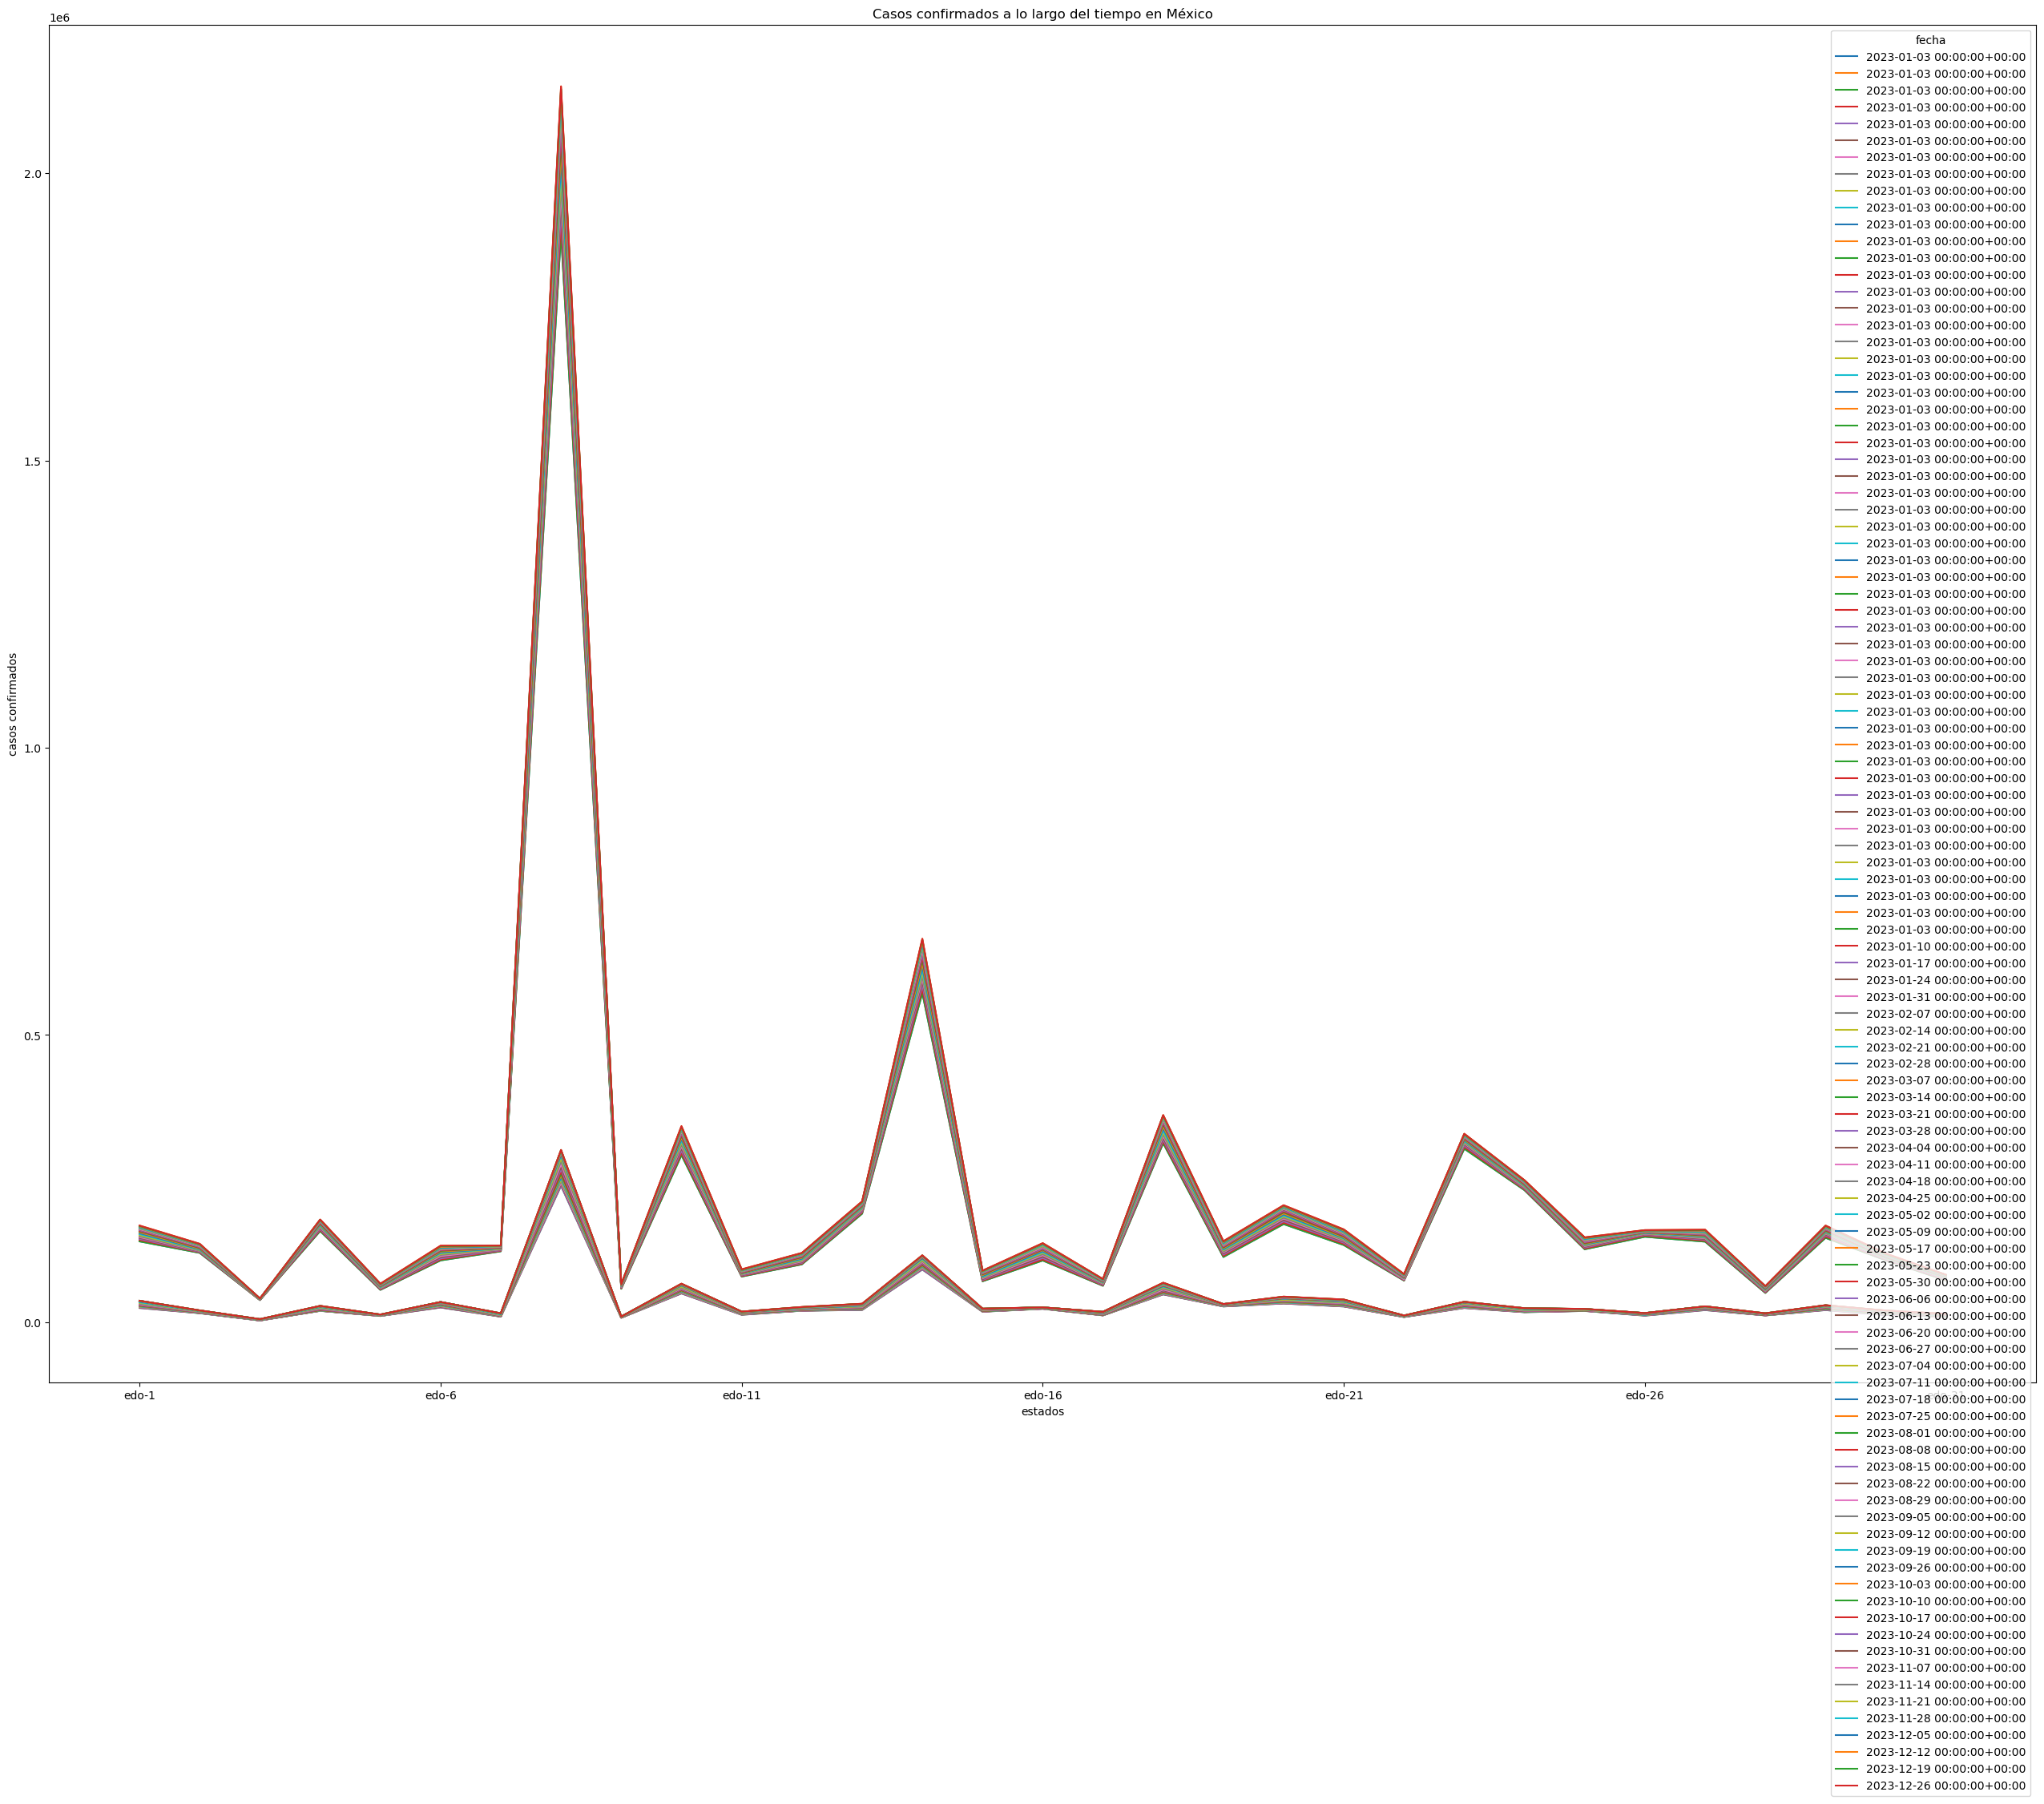

In [113]:
d.iloc[:,1:].T.plot(figsize=(32,22), title="Casos confirmados a lo largo del tiempo en México")
plt.xlabel("estados")
plt.ylabel("casos confirmados")
plt.savefig("casos_confirmados_mexico.png")

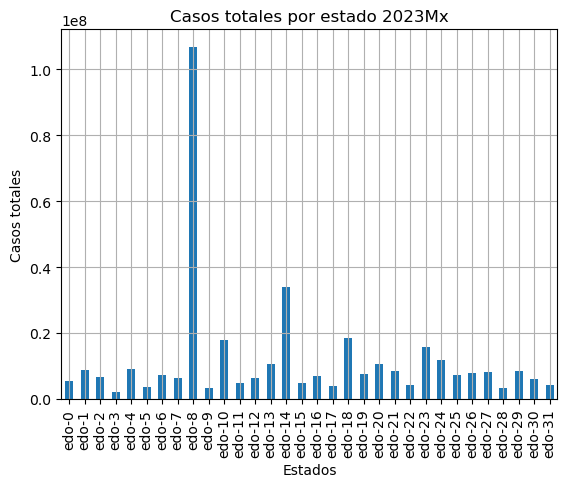

In [61]:
d.iloc[:,1:].sum().plot(kind="bar")
plt.title("Casos totales por estado 2023Mx")
plt.xlabel("Estados")
plt.ylabel("Casos totales")
plt.grid()
plt.savefig("casos_totales_por_estado.png")

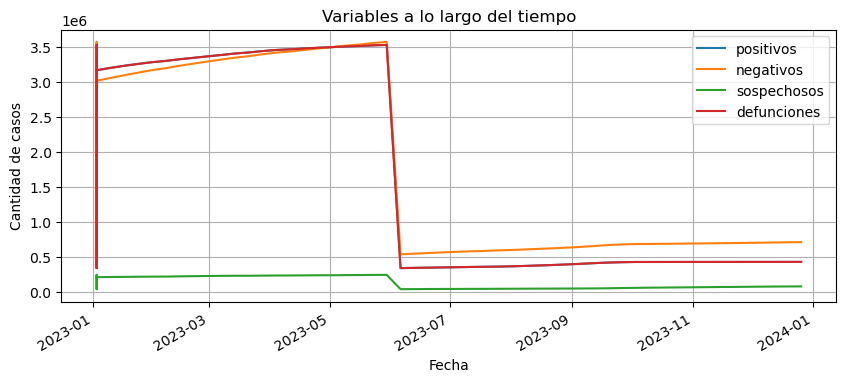

In [49]:
f1 = d.loc['2023-01':'2023-12',["positivos","negativos","sospechosos","defunciones"]]
f1.plot(figsize=(10,4))
plt.title("Variables a lo largo del tiempo")
plt.xlabel("Fecha")
plt.ylabel("Cantidad de casos")
plt.grid()
plt.savefig("grafico.png")